# Basic Bitcoin Plots

In [1]:
%matplotlib inline

In [2]:
import math
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
# Note that matplotlib notebook renders interactive plot
%matplotlib notebook

In [5]:
# Read BTC daily price in USD from cryptocompare.com
def read_price(sym, fiat='USD'):
    url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={sym}&tsym={fiat}&allData=true" # f-strings with curly braces containing expressions 
    # will be replaced by their values
    response = requests.get(url) # GET method
    js = json.loads(response.text)
    data = js['Data']['Data']
    with open(f'data_file_{sym}_{fiat}.json', 'w') as write_file:
        json.dump(data, write_file) # write data into write_file
        
    df = pd.read_json(f'data_file_{sym}_{fiat}.json', orient='records')
    df['time'] = pd.to_datetime(df['time'], unit='s') # change date format
    df = df.set_index('time')
    return df

In [6]:
btc_price = read_price('BTC')
btc_price.to_csv(f'prices_BTC.csv')

In [87]:
btc_price

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,20.00,9.902000e-01,0.04951,direct,
2010-07-18,0.08585,0.05941,0.04951,75.01,5.092000e+00,0.08584,direct,
2010-07-19,0.09307,0.07723,0.08584,574.00,4.966000e+01,0.08080,direct,
2010-07-20,0.08181,0.07426,0.08080,262.00,2.059000e+01,0.07474,direct,
2010-07-21,0.07921,0.06634,0.07474,575.00,4.226000e+01,0.07921,direct,
...,...,...,...,...,...,...,...,...
2022-07-20,24276.14000,22923.14000,23399.91000,74279.35,1.752952e+09,23222.77000,direct,
2022-07-21,23419.67000,22348.64000,23222.77000,52462.17,1.201005e+09,23153.54000,direct,
2022-07-22,23749.68000,22513.01000,23153.54000,42569.62,9.876927e+08,22686.32000,direct,


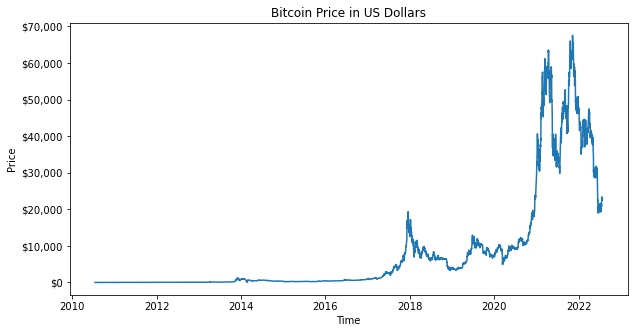

In [51]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(btc_price[['close']])
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Bitcoin Price in US Dollars')

ax.yaxis.set_major_formatter('${x:,.0f}')

plt.savefig('prices_BTC.png')
plt.show()

In [107]:
# daily transaction volume

btc_volume = pd.read_csv(f'btc-usd-max.csv')
# extract only date information from timestamp
btc_volume['date'] = [x[:10] for x in btc_volume['snapped_at']]

# get the date only, drop the hours and timezone
btc_volume['snapped_at'] = pd.to_datetime(btc_volume['snapped_at']).dt.date
btc_volume.set_index('snapped_at')

,price,market_cap,total_volume,date
snapped_at,,,,
2013-04-28,135.300000,1.500518e+09,0.000000e+00,2013-04-28
2013-04-29,141.960000,1.575032e+09,0.000000e+00,2013-04-29
2013-04-30,135.300000,1.501657e+09,0.000000e+00,2013-04-30
2013-05-01,117.000000,1.298952e+09,0.000000e+00,2013-05-01
2013-05-02,103.430000,1.148668e+09,0.000000e+00,2013-05-02
...,...,...,...,...
2022-07-20,23366.907698,4.458890e+11,5.733822e+10,2022-07-20
2022-07-21,23313.296732,4.461300e+11,4.077572e+10,2022-07-21
2022-07-22,23155.207555,4.423796e+11,6.322425e+10,2022-07-22


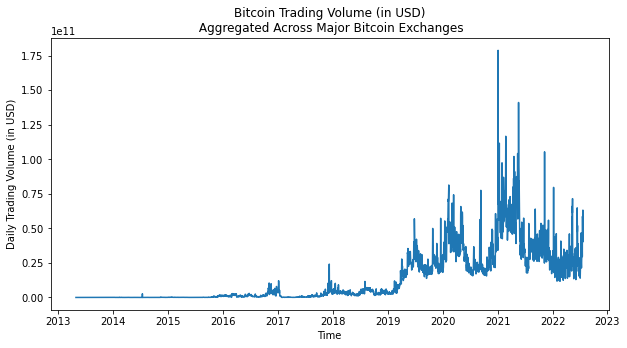

In [110]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(btc_volume['snapped_at'], btc_volume['total_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Daily Trading Volume (in USD)')
ax.set_title("Bitcoin Trading Volume (in USD)\n Aggregated Across Major Bitcoin Exchanges")

plt.savefig('volume_BTC.png')
plt.show()